### requests
- 웹 문서를 요청하거나 응답받을 때 사용하는 라이브러리(모듈)
- url 주소를 입력하여 해당 페이지의 html 정보를 요청하고 응답받는다

In [1]:
import requests as req

In [2]:
url = 'https://www.naver.com/'

# url에 저장되어 있는 웹 문서 요청하기 : get()
# Response[200] : 성공적으로 요청/응답이 진행된 상태
res = req.get(url) # res 라는 변수 안에 불러온 req(requests)에서 get(가져오겠다) url을
res

<Response [200]>

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
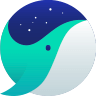
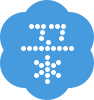

In [3]:
# 응답받은 데이터(res)에서 웹 문서 접근하기
res.text

### BeautifulSoup (bs)
- 웹 문서 안에 있는 데이터를 추출할 수 있도록 함수를 제공해주는 모듈
- 1. req를 통해서 html 정보를 받아옴 (데이터정보 - 텍스트) --> 파이썬객체로 변환
- 2. bs 제공하는 함수를 통해 원하는 태그의 정보에 접근하여 데이터를 추출할 수 있다

In [4]:
from bs4 import BeautifulSoup as bs

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
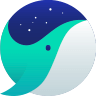
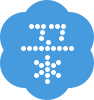

In [5]:
# req를 통해 html 정보(텍스트형태) --> 파이썬객체로 변환(태그 접근)
html = bs(res.text, 'lxml') # 파이썬으로 변환할 때 'lxml' 꼭 써줘야 함 (파싱 parsing)
html

In [6]:
# css 선택자를 활용하여 접근할 수 있게 하는 함수 : .select_one()
# .select_one().text --> 태그 안에 있는 텍스트만 가져올 때 사용
# html.select_one(css선택자) : css선택자에 맞는 가장 먼저 찾아지는 첫번째 html 객체에 접근

# css 선택자
# 태그 선택자 : 태그명
# 아이디 선택자 : #아이디명
# 클래스 선택자 : .클래스명
# 계층 선택자 : 자식(>), 자손(공백), 형제(~), 인접형제(+)
html.select_one('title').text

'NAVER'

In [7]:
# html.select(css선택자) : css선택자에 맞는 html모든 객체에 접근하는 함수
# 결과가 리스트 형식으로 반환
html.select('title')[0].text

'NAVER'

### 네이버 통합검색 페이지에서 데이터 수집하기
- 검색키워드 : 겨울축제

In [8]:
# 1. url2
url2 = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EA%B2%A8%EC%9A%B8%EC%B6%95%EC%A0%9C'
# 2. get() html에 요청
res2 = req.get(url2)
#3. bs 파이썬 객체로 변환 -> 겨울축제 이름들 추출
html2 = bs(res2.text, 'lxml')
html2

<!DOCTYPE html>
<html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="겨울축제 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'겨울축제'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'겨울축제'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>겨울축제 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_221215.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/ss

In [17]:
# 4. 겨울축제 이름들 추출
# 1개만 가져와볼래! --> select_one()
html2.select_one('strong > a').text
# html2.select_one('.this_text > a').text

'제주 허브동산 "별빛놀이"'

In [23]:
# 4개 다 가져와보기! (1)
for i in range(4):
        print(html2.select('strong > a')[i].text)

제주 허브동산 "별빛놀이"
안산별빛마을 애니멀 & 하트빌리지 빛축제
퍼스트가든 빛축제 - 별빛이 흐르는 정원
별빛정원우주 365일 별빛축제


In [24]:
# 4개 다 가져와보기! (2)
a =len(html.select('.this_text > a'))
for i in range(a):
    print(html.select('.this_text > a')[i].text)

제주 허브동산 "별빛놀이"
안산별빛마을 애니멀 & 하트빌리지 빛축제
퍼스트가든 빛축제 - 별빛이 흐르는 정원
별빛정원우주 365일 별빛축제


In [26]:
# 4개 다 가져와보기! (3)
html2_lst = html2.select('.this_text > a')
for data in html2_lst:
    print(data.text)

제주 허브동산 "별빛놀이"
안산별빛마을 애니멀 & 하트빌리지 빛축제
퍼스트가든 빛축제 - 별빛이 흐르는 정원
별빛정원우주 365일 별빛축제


In [27]:
len(html2_lst) # 리스트 길이파악

4

In [28]:
for i in range(0, len(html_lst)):
    print(html2_lst[i].text)

제주 허브동산 "별빛놀이"
안산별빛마을 애니멀 & 하트빌리지 빛축제
퍼스트가든 빛축제 - 별빛이 흐르는 정원
별빛정원우주 365일 별빛축제


In [32]:
# href 속성값 접근
link = html2_lst[0].get('href')
link2 = 'https://search.naver.com/search.naver' + link
print(link2)

https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bk00&pkid=110&os=4825314&qvt=0&query=%EC%A0%9C%EC%A3%BC%20%ED%97%88%EB%B8%8C%EB%8F%99%EC%82%B0%20%EB%B3%84%EB%B9%9B%EB%86%80%EC%9D%B4


### 네이버 뉴스 기사 크롤링하기
- 뉴스 제목, 내용 수집한 후 출력해보기
- 1. 어떤 태크에 있는지
- 2. 어떤 클래스 등등 속성으로 이루어져 있는지

In [33]:
news_url = 'https://n.news.naver.com/article/660/0000023947?cds=news_media_pc&type=editn'
res3 = req.get(news_url)
res3
# 에러가 난다면 > 컴퓨터에게 브라우저에서 요청했다는 인식을 설정할 필요가 있음

<Response [200]>

In [34]:
# 브라우저 요청 인식 설정
# 모든 페이지를 요청할 때 header값 지정을 해주면 된다!
header = {'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}

In [35]:
news_url = 'https://n.news.naver.com/article/660/0000023947?cds=news_media_pc&type=editn'
res3 = req.get(news_url, headers = header)
res3

<Response [200]>

In [37]:
# 파이썬 객체 변환
news_html = bs(res3.text, 'lxml')
news_html

<!DOCTYPE html>
<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="광주시민 참여로 물 부족 개선..내년 5월까지 사용가능" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="https://n.news.naver.com/article/660/0000023947" property="og:url"/>
<meta content="https://imgnews.pstatic.net/image/660/2022/12/13/0000023947_001_20221213105901732.jpg" property="og:image"/>
<meta content='광주시가 가뭄이 계속되고 있지만 시민들의 참여로 물 부족 상황이 다소 완화됐다고 밝혔습니다. 강기정 광주시장은 오늘(13일) 시청에서 기자들을 만나 "10월부터 시민들이 물 절약에 적극적으로 참여해주셔서 상황이 완화' property="og:description"/>
<meta content="kbc광주방송 | 네이버" property="og:article:author"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="광주시

In [53]:
# 뉴스제목, 내용만 가져오기
news_title = news_html.select('.media_end_head_headline > span')[0].text
news_title

'광주시민 참여로 물 부족 개선..내년 5월까지 사용가능'

In [60]:
news_txt = news_html.select('#dic_area')[0].text.strip()
news_txt

'광주시가 가뭄이 계속되고 있지만 시민들의 참여로 물 부족 상황이 다소 완화됐다고 밝혔습니다.강기정 광주시장은 오늘(13일) 시청에서 기자들을 만나 "10월부터 시민들이 물 절약에 적극적으로 참여해주셔서 상황이 완화됐다"며 "내년 3월 고갈 위기였던 동복호는 현 상황에서는 5월 14일까지로 사용 기간이 늘었다"고 말했습니다.10월 셋째주 전년 동기 대비 수돗물 생산량이 1% 감소한 것을 시작으로, 10월 넷째주 1%, 11월 첫째주 2.4%, 11월 둘째주 2.4%, 11월 셋째주 5.6%, 11월 넷째주 6.2%, 12월 첫째주 8.2%, 12월 둘째주 8.7% 까지 줄었습니다.가뭄과 관련해 행정안전부에 요청한 특별교부세도 기존에 받았던 19억원에 이어 지난 12일 추가로 40억원을 받았다고 덧붙였습니다. 강 시장은 이번 특교세는 영산강 하천유지용수 활용 등에 활용될 예정이며, 내년 3월부터는 영산강 물을 수돗물로 사용할 수 있을 것으로 전망했습니다.다만 현재 상황이 이대로 이어진다면 제한급수 시행도 완전히 배제할 수는 없다는 입장입니다.강 시장은 "다수의 전문가들이 내년 3월부터는 격일제 제한급수를 시작해야 한다는 의견이 있다"며 "다만 제한 급수 자체가 물을 받아서 쓰기때문에 그 효과가 크지 않을 것이란 반론도 고려하고 있다"고 강조했습니다.'

In [61]:
print(news_title)
print(news_txt)

광주시민 참여로 물 부족 개선..내년 5월까지 사용가능
광주시가 가뭄이 계속되고 있지만 시민들의 참여로 물 부족 상황이 다소 완화됐다고 밝혔습니다.강기정 광주시장은 오늘(13일) 시청에서 기자들을 만나 "10월부터 시민들이 물 절약에 적극적으로 참여해주셔서 상황이 완화됐다"며 "내년 3월 고갈 위기였던 동복호는 현 상황에서는 5월 14일까지로 사용 기간이 늘었다"고 말했습니다.10월 셋째주 전년 동기 대비 수돗물 생산량이 1% 감소한 것을 시작으로, 10월 넷째주 1%, 11월 첫째주 2.4%, 11월 둘째주 2.4%, 11월 셋째주 5.6%, 11월 넷째주 6.2%, 12월 첫째주 8.2%, 12월 둘째주 8.7% 까지 줄었습니다.가뭄과 관련해 행정안전부에 요청한 특별교부세도 기존에 받았던 19억원에 이어 지난 12일 추가로 40억원을 받았다고 덧붙였습니다. 강 시장은 이번 특교세는 영산강 하천유지용수 활용 등에 활용될 예정이며, 내년 3월부터는 영산강 물을 수돗물로 사용할 수 있을 것으로 전망했습니다.다만 현재 상황이 이대로 이어진다면 제한급수 시행도 완전히 배제할 수는 없다는 입장입니다.강 시장은 "다수의 전문가들이 내년 3월부터는 격일제 제한급수를 시작해야 한다는 의견이 있다"며 "다만 제한 급수 자체가 물을 받아서 쓰기때문에 그 효과가 크지 않을 것이란 반론도 고려하고 있다"고 강조했습니다.
